# Debug Utilization

- `gradient_check_n` : Check if our computed gradient is correct by Center Numerical Differentiation

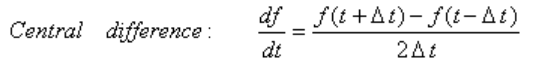

In [1]:
import import_ipynb

In [2]:
from mlp_component import L_model_forward
from compute_cost import *
from utils.py_util import dictionary_to_vector, vector_to_dictionary, gradients_to_vector


# %% External module
import numpy as np

importing Jupyter notebook from mlp_component.ipynb
importing Jupyter notebook from regularization.ipynb
importing Jupyter notebook from compute_cost.ipynb
importing Jupyter notebook from losses.ipynb


In [3]:
def gradient_check_n(parameters, gradients, X, Y,
                     activation_function, output_activation_function , 
                     loss_function  , regularization = None,
                     epsilon = 1e-7, **kwargs):
    
    """
    Arguments:
    loss_function : function object: 
    regularization : str -- 
    
    Keyword Arguments:
    -----------------------------------------
    lambd --- Regularization parameter for L2 Regularization 
    param --- Parameter for L2 Regularization (Especially weight)
    """
    
    parameters_values, _ = dictionary_to_vector(parameters) #len(parameter_value) = all_parameter
    grad = gradients_to_vector(parameters,gradients)                   # same len 
    num_parameters = parameters_values.shape[0]             # simply len(parameter_value)
    
    J_plus = np.zeros((num_parameters, 1))                  # + epsilon
    J_minus = np.zeros((num_parameters, 1))                 # - epsilon
    gradapprox = np.zeros((num_parameters, 1))              # d..
    
    # Compute gradapprox for every SINGLE parameter
    for i in range(num_parameters):        
       
        thetaplus = np.copy(parameters_values)              # deepcopy
        thetaplus[i][0] = thetaplus[i][0] + epsilon
        AL, caches = L_model_forward(X = X,
                                     param = vector_to_dictionary(thetaplus,parameters), #FIXED
                                     hidden_activation_function = activation_function,
                                     output_activation_function = output_activation_function)
        
        J_plus[i] = compute_cost(AL, Y, loss_function, regularization, **kwargs)
        
        thetaminus = np.copy(parameters_values)
        thetaminus[i][0] = thetaminus[i][0] - epsilon
        AL, caches = L_model_forward(X = X,
                                     param = vector_to_dictionary(thetaminus,parameters),
                                     hidden_activation_function = activation_function,
                                     output_activation_function = output_activation_function)
        
        J_minus[i] = compute_cost(AL,Y, loss_function, regularization, **kwargs)
        
        gradapprox[i] = (J_plus[i]-J_minus[i])/(2*epsilon) # grad of SINGLE param
    
    
    numerator = np.linalg.norm(gradapprox-grad)                   # L2 norm
    denominator = np.linalg.norm(gradapprox)+np.linalg.norm(grad) 
    difference = numerator/denominator

    if difference > 2*epsilon:
        print ("\033[93m" + "⚠️ Probably, there is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "✔️ Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference